# Teaching Models How to Classify Photos
## By Beatrice Ling 64589033

This notebook analyzes 50,000 images of different articles of clothing and 100,000 images of handwritten English letters, which results in the formation of trained machine learning models that could be able to predict the labels of new photos accurately. The labels come in the form of numbers, one for the object or letter the photo represents. My goal was to test different machine learning models and algorithms that I found of interest, while still following the MATH 10 final project guidelines. I will be using both supervised and unsupervised models as instructed to analyze the data. We will compare the accuracy of each supervised learning model at the end of the report.



Pandas, NumPy, Seaborn, and Matplotlib are the first few packages I use to load the data, visualize a sample of each dataset, and change the datasets into NumPy arrays that I can manipulate as needed. Pandas is a software library that provides Python users tools to manipulate and analyze data. NumPy alows us to handle large arrays and matrices and perform complicated functions on them. Matplotlib provides an application programming interface that allows one to make plots in Python and is an extension of NumPy. Seaborn gives us the same tools, but with simpler, user-friendly syntax and more aesthetically pleasing default themes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

## Loading the Data
The datasets are provided already partitioned into training and test datasets. Here, I use pandas to import the .csv files.

In [3]:
fashiontrain=pd.read_csv('fashion-mnist_train.csv')
fashiontest=pd.read_csv('fashion-mnist_test.csv')
lettertrain=pd.read_csv('EMNIST_letters_train.csv', header=None) #no column headings in the EMNIST letters datasets
lettertest=pd.read_csv('EMNIST_letters_test.csv',header=None)

Each photo was originally a 28x28 shaped photo and is stored by being flattened into a 784 length row in a dataframe, with each column representing a pixel. For the fashiontrain dataset, we should have 60,000 rows, each one representing a photo, and 785 columns, the first one for the label, and the rest for the pixels. Each column represents the intensity of that specific pixel for that specific photo. 

In [3]:
print(fashiontrain.shape)
fashiontrain.sample(5)

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
77,4,0,0,0,0,0,0,0,0,0,...,93,104,94,113,107,80,69,0,0,0
18691,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58447,0,0,0,0,0,0,3,0,0,0,...,164,168,158,167,60,0,3,0,2,0
53220,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28562,2,0,0,0,0,0,0,0,0,0,...,0,2,0,37,184,68,0,0,0,0


I split the training data further to allocate a set for validation data, so I can assess overfitting in my models. I turn the rows and first column of the dataframe into NumPy arrays for linear algebra calculations I will need to perform on the data later. Let's look at the shape of our new arrays.

In [4]:
Xf = fashiontrain.drop(columns='label',inplace=False) #Deleting the labels of training photos
X_trainf = Xf[0:50000].to_numpy() #50,000 photos allocated for training turned into numpy array
yf = fashiontrain['label'].to_numpy() #Labels of training photos turned into numpy array
y_trainf = yf[0:50000] 
X_valf = Xf[50000:].to_numpy() #validation dataset as numpy array
y_valf = yf[50000:] #Labels of validation dataset as numpy array
X_testf = fashiontest.drop(columns=['label'],inplace=False).to_numpy() #Deleting the labels of my test data, 10,000 photos as numpy array
y_testf = fashiontest['label'].to_numpy() #Labels of test photos as numpy array

print('The shapes of: \nFashion training dataset:', X_trainf.shape)#print shapes of fashion data
print('Labels of fashion training dataset:', y_trainf.shape)
print('Fashion validations set:', X_valf.shape)
print('Labels of fashion validation set:', y_valf.shape)
print('Fashion test dataset:', X_testf.shape)
print('Labels of fashion test dataset:', y_testf.shape, "\n")

numbers=list(range(0,785)) #index of pixels
labels=['pixel'+str(x+1) for x in numbers] #new heading
labels.insert(0, 'label') #insert label heading
old_namestrain = lettertrain.columns[numbers] 
old_namestest = lettertest.columns[numbers]
lettertrain.rename(columns=dict(zip(old_namestrain, labels)), inplace=True)#replace old column heading with new heading for EMNIST training dataframe
lettertest.rename(columns=dict(zip(old_namestest,labels)),inplace=True)#for EMNIST test dataframe
lettertrain['label'].replace(list(np.arange(26)+1),list(range(26)), inplace=True)#change index of labels for EMNIST training set
lettertest['label'].replace(list(np.arange(26)+1),list(range(26)), inplace=True)#change index of labels for EMNIST test set


Xe = lettertrain.drop(columns='label', inplace=False)
X_traine = Xe[0:100000].to_numpy()#EMNIST training set consisting of 100,000 photos turned into numpy array
ye = lettertrain['label'].to_numpy()#labels column turned into numpy array
y_traine = ye[0:100000]#EMNIST training set labels
X_vale = Xe[100000:].to_numpy()#EMNIST validation dataset consisting of 24,800 photos as numpy array
y_vale = ye[100000:]#EMNIST validation dataset labels as numpy array
X_teste = lettertest.drop(columns=['label'],inplace=False).to_numpy()#EMNIST test dataset, 20800 photos as numpy array
y_teste = lettertest['label'].to_numpy() #EMNIST test dataset labels as numpy array

print('EMNIST training dataset:', X_traine.shape)#print shapes of EMNIST data
print('Labels of EMNIST training dataset:', y_traine.shape)
print('EMNIST validation dataset:', X_vale.shape)
print('Labels of EMNIST validation dataset', y_vale.shape)
print('EMNIST test dataset:', X_teste.shape)
print('Labels of EMNIST test dataset:', y_teste.shape)

The shapes of: 
Fashion training dataset: (50000, 784)
Labels of fashion training dataset: (50000,)
Fashion validations set: (10000, 784)
Labels of fashion validation set: (10000,)
Fashion test dataset: (10000, 784)
Labels of fashion test dataset: (10000,) 

EMNIST training dataset: (100000, 784)
Labels of EMNIST training dataset: (100000,)
EMNIST validation dataset: (24800, 784)
Labels of EMNIST validation dataset (24800,)
EMNIST test dataset: (20800, 784)
Labels of EMNIST test dataset: (20800,)


Let's look at what the images of each dataset actually look like.

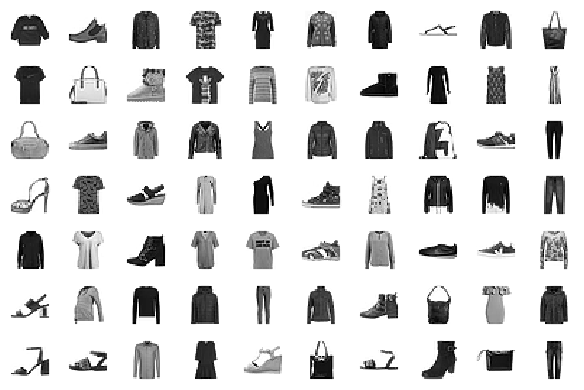

In [5]:
plt.figure(dpi=100)
for i in range(0,70): #plot the first 70 images
    plt.subplot(7,10,i+1)
    grid_data = Xf.iloc[i,:].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data,cmap='gray_r', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

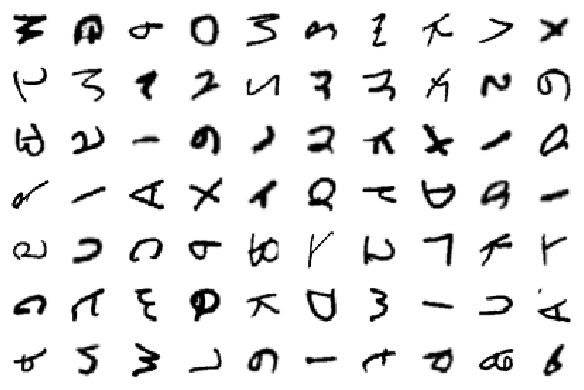

In [6]:
plt.figure(dpi=100)
for i in range(0,70): #plot the first 70 images
    plt.subplot(7,10,i+1)
    grid_data = Xe.iloc[i,:].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data,cmap='gray_r', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

## Softmax Regression
Predicting the labels of these datasets requires what is called multi-class classification; in this supervised learning problem, each class is a label. We have 10 classes for the fashion datasets, one for each type of article of clothing, and 26 classes for the EMNIST datasets, one for each letter in the English alphabet. Softmax or multinomial logistic regression is a classification method that predicts the probabilities of an input belonging to a class. We use the softmax function to take a set of vectors as input and normalizes them into outputs between 0 and 1, creating a probability distribution, representing how likely an input belongs to each class.This function becomes a model that is incrementally trained to have a probability distribution that closely matches an input's labels. 

$$ h(\mathbf{x};W) = \mathbf{\sigma}(W^T\mathbf{x}) = \frac{1}{\sum_{k=1}^K\exp\big(\mathbf{w}_k^T \mathbf{x}\big)} \begin{pmatrix}
   \exp(\mathbf{w}_1^T \mathbf{x}) \\
   \exp(\mathbf{w}_2^T \mathbf{x}) \\
   \vdots \\
   \exp(\mathbf{w}_K^T \mathbf{x})
\end{pmatrix} $$

Weights or the contribution of parameters towards the probability distribution are adjusted through iterative methods. We want to minimize the loss between the true probability distribution of our labels and the predicted probability of our data set. We do this by attempting to find the minimum of the cross-entropy function. 
$$ H(p,q) = -\sum_{k=1}^K p_k\log(q_k) = -\Big\{y_i\ln\big(h(\mathbf{x}_i; \mathbf{w})\big) + (1-y_i)\ln\big(1 - h(\mathbf{x}_i; \mathbf{w})\big) \Big\}$$

I minimize this function by using mini-batch gradient descent with adaptive moment estimation (ADAM). I find the global minimum of a function by taking small steps, determined by the chosen learning rate, in the direction of the gradient of the loss function. Each step will alter the weights of the parameters. I start the process by shuffling the data and find the gradient of the loss function with the input being a mini batch of size 1000 instead of the input being the whole dataset. This minimizes the number of calculations having to be done for each iteration, minimizing training time. This also reduces variance of the parameter updates, leading to possibly a more stable convergence of parameter values. ADAM then computes adaptive learning rates based on stored exponentially decaying squared gradients and gradients m and t; these are called moments and represent the mean and uncentered variance of the gradients.

$$ \begin{align*}
    \mathbf{m}_{k+1} &= \beta_1 \mathbf{v}_k + (1 - \beta_1)\nabla f(\mathbf{w}_k) \\
    \mathbf{v}_{k+1} &= \beta_2 \mathbf{v}_k + (1 - \beta_2)\left(\nabla f(\mathbf{w}_k)\right)^2 \end{align*} $$
    
These values are biased towards zero because they start out as vectors of zeros, so we use parameters epsilon, b1, and b2 to correct this bias. This process results in a decaying learning rate, but more momentum as more epochs are run. 

$$ \begin{align*}
  \hat{\mathbf{m}}_{k+1} &= \frac{\mathbf{m}_{k+1}}{1-\beta_1^{k+1}} \\
   \hat{\mathbf{v}}_{k+1} &= \frac{\mathbf{v}_{k+1}}{1-\beta_2^{k+1}} \end{align*} $$
   
Finally, we can plug in new data into our trained softmax function with the "best" parameters and compare the probabilities in their outputted probability distribution to find the class with the greatest probability value. We predict labels of new data with this method, and then we can calculate the accuracy of our predictions by comparing our predicted labels to the true labels. For my softmax regression class, I determined that a batch size of 1000 and 50 epochs produced the best scores for both datasets.

In [7]:
class softmax_regression():
    
    """ Logistic Regression classifier for the multiclass classification problem. """
    
   
    def sigmoid(self,X,W):
        '''
        The generalized sigmoid function, or softmax function. Calculates a probability distribution based on the inputs X and W.
        
        Parameters
        ----------
            X : 2D numpy array with shape (N,p) samples matrix of N samples and p features
            W : 2D numpy array with shape (p,K) weights matrix of p weights for K classes
        
        Returns
        -------
            Returns probability distribution matrix represented by a (N,K) shaped array, ith row for the ith sample, jth column for the jth probability'''
        s = np.exp(np.matmul(X,W))#exponential of the multiplication of X and W
        total = np.sum(s, axis=1).reshape(-1,1)#Sum of all the above exponentials
        return s/total
    
    def loss(self, W,X,y,K):
        '''
        The cross-entropy function between the true and predicted probability distributions.
        
        Parameters
        ----------
            X : 2D numpy array with shape (N,p) samples matrix of N samples and p features
            W : 2D numpy array with shape (p,K) weights matrix of p weights for K classes
            y : 1D numpy array with shape (N,) of class labels for N samples
            K : float or integer, number of classes
        
        Returns
        -------
            2D numpy array with shape (N,K) that represents the difference between two probabability distributions.
        '''
        self.K= K
        N = len(y)
        loss_components = np.zeros(N) #initialize loss component matrix
        # model output is shape (N,K), so loop through columns (sum over k),
        # pick out terms where y==k, and add them up
        log_L_of_W = np.log(self.sigmoid(X,W)) # evaluate L only once
        for k in range(self.K):
            loss_components += log_L_of_W[:,k]*(y == k) # y==k is same as the componentwise Kronecker delta
        return -np.mean(loss_components)

    def gradient_loss(self,W,X,y,K):
        '''Finds the gradient or minimum of the loss function of softmax regression.
        
        Parameters
        ----------
            X : 2D numpy array with shape (N,p) samples matrix of N samples and p features
            W : 1D numpy array with shape (p,K) weights matrix of p weights for K classes
            y : 1D numpy array with shape (N,) of class labels for N samples
            K : float or integer, number of classes
        
        Returns
        -------
            Output is (p,K) weight update matrix for gradient descent.'''
        self.K= K
        m=X.shape[1]
        # dLdW has K columns, each column is the gradient of L wrt w_k
        dLdW = np.zeros((m,self.K)) #initialize gradient matrix
        L_of_W = self.sigmoid(X,W)  # evaluate L only once
        for k in range(self.K):
            # model output is shape (N,K); single column is (N,), so reshape into
            # column vector to multiply by X for (N,m) output
            dLdWk =(L_of_W[:,k] - (y==k)).reshape(-1,1)*X 
            # take mean along rows to get (m,) output
            dLdW[:,k] = np.mean(dLdWk, axis=0)
        return dLdW
                  
    def fit(self, data, y, learning_rate, K, eps=1e-8, b1=0.9,b2=0.999):
        """ 
        Trains model with ADAM optimizer and mini-batch gradient descent.
        
        Parameters
        ----------
            data : 2D numpy array with shape (N,p) samples matrix of N samples and p features
            y : 1D numpy array with shape (N,) of class labels for N samples
            learning_rate : float, step size of gradient descent
            K : float or integer, number of classes
            b1 : The exponential decay rate for the first moment estimates 
            b2 : The exponential decay rate for the second-moment estimates 
            eps : float, prevents any division by zero in the implementation
        Returns
        -------
            Self : Returns an instance of self with new attribute W, the updated weights matrix, a numpy array
        """
        self.K=K
        self.learning_rate = learning_rate
        self.size_batch = 1000 #batch size of 1000
        self.epoch = 50 #50 full epochs
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix
        eta = self.learning_rate
               
        mb=np.zeros((np.shape(X)[1],max(y)+1)) #initialize moments matrix
        vb=np.zeros((np.shape(X)[1],max(y)+1))
        W  = np.zeros((np.shape(X)[1],max(y)+1)) # initialize weights matrix, can be other choices
        
        N = X.shape[0]

                
        for e in range(self.epoch):
            shuffle_index = np.random.permutation(N) # in each epoch, we first reshuffle the data to create "randomness"
            for m in range(0,N,self.size_batch):   # m is the starting index of mini-batch
                i = shuffle_index[m:m+self.size_batch]
                # index of samples in the mini-batch
                dW = self.gradient_loss(W,X[i,:],y[i],self.K) #gradient of mini-batch
                # update momentum
                mb = b1*mb + (1-b1)*dW

                # update learning rate
                vb = b2*vb + (1-b2)*dW**2
                # correct each
                mb_ = mb/(1-b1**(e+1))
                vb_ = vb/(1-b2**(e+1))

                # update gradient
                eta_b = eta/(np.sqrt(vb_) + eps)
                W-= eta_b*mb_ 
                
        self.coeff=W
        
    def predict(self, data):
        """ 
        Predicts list of labels by running input data through trained model
        
        Parameters
        ----------
            data : 2D numpy array with shape (N,p) samples matrix of N samples and p features
            
        Returns
        -------
            Returns 1D numpy array of predicted y values with shape (N,)"""
        
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix
        W = self.coeff # the updated W
        y_pred = np.argmax(self.sigmoid(X,W), axis =1) # the category with largest probability
        return y_pred
    
    def score(self, data, y_true):
        """ 
        Predicts list of labels by running input data through trained model
        
        Parameters
        ----------
            data : 2D numpy array with shape (N,p) samples matrix of N samples and p features
            y_true : 1D array with shape (N,) list of true labels of input data
            
        Returns
        -------
            Returns float, accuracy of trained model's prediction"""
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix
        y_pred = self.predict(data)#predict y values of data
        acc = np.mean(y_pred == y_true) # number of correct predictions/N
        return acc
   

In [8]:
test=softmax_regression()


Here, I am training the softmax regression model with the fashion training dataset. Based on trial and error and reading articles and threads, I have concluded that the best learning rate for this dataset and model is 1e-4, which I thought was a surprisingly small start for a decaying learning rate. 

In [9]:
test.fit(X_trainf,y_trainf,1e-4,10) #epoch=50 batch 1000 lr=1e-4 K=10

Let's see how our trained model does on the training set.

In [ ]:
print(test.score(X_trainf,y_trainf))

What about the performance the validation and test datasets?

In [10]:
print(test.score(X_valf,y_valf))
clf1=test.score(X_testf,y_testf)
print(clf1)

0.851
0.8514


Ok, let's see how this model performs on a larger set with harder to distinguish photos. There are many different ways to write letters!

In [11]:
test.fit(X_traine,y_traine,1e-4,26)#training model with EMNIST training dataset

In [12]:
print(test.score(X_traine,y_traine))#score on EMNIST training set
print(test.score(X_vale,y_vale))#score on EMNIST validation set
clf2= test.score(X_teste,y_teste)#score on EMNIST test set
print(clf2)


0.72785
0.7073387096774194
0.70625


Realistically, I believe my model performed well. There seems to be some overfitting, and it makes sense that the EMNIST dataset wasn't predicted as well after looking at the pictures ourselves.

## Principal Component Analysis

Next, I will be performing an unsupervised machine learning technique called principal component analysis to reduce the dimensionality of our datasets, while still retaining most of the information needed. A trade for accuracy is made for simplicity of the data, so I can visualize it and make an assessment of the information. First, I want to standardize the contribution of our initial variables so they contribute equally to the analysis. Next, I compute a covariance matrix where its entries are covariances that signifies the pair-wise correlations between each variable. I then compute the eigenvalues and their corresponding eigenvectors from the covariance matrix to determine the principal components of the data. These principal cmponents are our new variables, which are linear combinations of the initial variables.

 $$\mathbf{t}=\mathbf{h}(\mathbf{x})=\mathbf{x}\mathbf{V}_{k}, \mathbf{V}_{k}\in\mathbb{R}^{p\times k}.\$$
 
 These new variables are now uncorrelated, and most of the information from our data is compressed into the first few principal components, so we can discard those with low information. Principal components points in the direction that explains the data's maximal amount of variance. The larger the variance, the larger the dispersion of data along that direction. Listing the eigenvalues and eigenvectors in descending order allows me to find the principle components of most significance and create a feature vector of those new variables. Finally, I use this feature vector to reorient the data from the original axes to the ones described by the principle components. Our output is now a reoriented matrix with new dimensions.
 
 $$\mathbf{t}=\mathbf{h}(\mathbf{x}): \mathbb{R}^{1\times p}\to\mathbb{R}^{1\times k},k<<p$$

In [13]:
class PCA():
    
    """Performs each step of principle component analysis and also computes each principle components' variance ratio
    
    Parameters:
    -----------
        n_pc : float or integer,the number of principal components desired """
        
    def __init__(self, n_pc):
    
        self.n_c = n_pc
    
    def fit(self,X):
        """ 
        Creates covariance matrix of input X and forms eigenvalues and eigenvectors of covariance matrix.
        Formulates feature vector, and a covariance ratio matrix.
        
        Parameters:
        -----------
            X : 2D numpy array with shape (N,p) samples matrix of N samples and p features and is of dimension (lxp)
        Returns
        -------
            Self : Returns an instance of self with new attributes e_values, a numpy array of eigenvalues, pc, 
            a new feature matrix as a numpy array, v_ratio, a matrix of variance ratios of each principal component as numpy array.
            
            """
        cov = np.cov(X.T) # covariance matrix, the input matrix to this function does not need to be centered
        e_val, e_vec = np.linalg.eigh(cov) #eigen-values and orthogonal eigen-vectors --ascending order
        e_val = np.flip(e_val) # reverse the order --descending
        e_vec = np.flip(e_vec,axis=1) # reverse the order
        self.e_values = e_val[:self.n_c] # select the top eigen-vals
        self.pc = e_vec[:,:self.n_c] # select the top eigen-vecs
        self.v_ratio = self.e_values/e_val.sum() # variance explained by each PC
    
    def transform(self,X):
        """
        Recasts the data along principal component axes through matrix multiplication.
        
        Parameters:
        -----------
            X : 2D numpy array with shape (N,p) samples matrix of N samples and p features and is of dimension (lxp)
        Returns
        -------
        Reoriented data matrix with new dimension (lxk) """
        
        return np.matmul(X-X.mean(axis = 0),self.pc) #project the data (centered) on PCs

I want to use my new principal component analysis class to find the top two principal components of my test datasets, so I can visualize the data and see how the principle components contribute to them. In my case, I am just performing a change of basis on my data since I start and end with a 2D space, but now most of my data's variance is compressed into the first principal component.

In [14]:
pca_teste=PCA(2)
pca_testf=PCA(2)
pca_testf.fit(X_testf)
pca_teste.fit(X_teste)
f_pca=pca_testf.transform(X_testf)
e_pca=pca_teste.transform(X_teste)

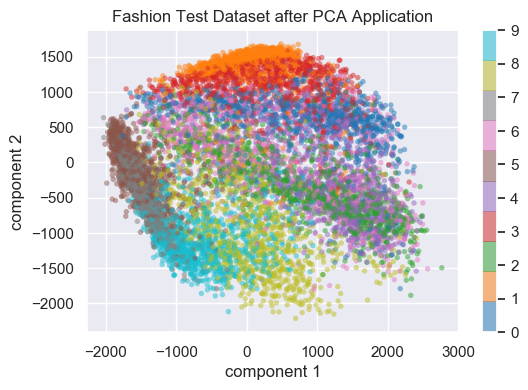

In [15]:
figure = plt.figure(dpi=100)
plt.scatter(f_pca[:, 0], f_pca[:, 1],c=y_testf, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.title('Fashion Test Dataset after PCA Application')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

From looking at this graph, it seems as if principal component one contributes to most of the classes evenly. Classes 9 and 5 seem to not be really determined by the first component. Principal component 2 seems to contribute greatly to classes 1 and 0 but not classes 8 and 9. 

Now let's apply PCA to the EMNIST test dataset and look at the scatterplot of the transformed EMNIST data with its first two principal components.

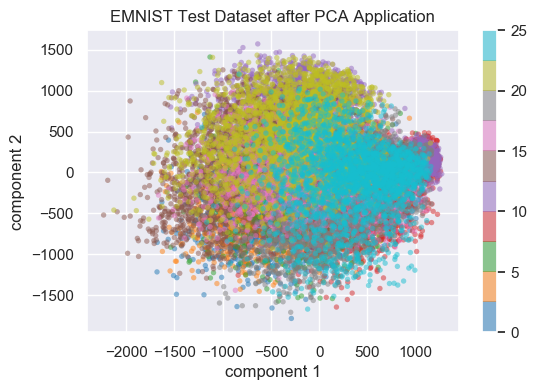

In [16]:
figure = plt.figure(dpi=100)
plt.scatter(e_pca[:, 0], e_pca[:, 1],c=y_teste, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.title('EMNIST Test Dataset after PCA Application')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

It looks as if the first principal component really contributes to the last 25 classes and and that the second principle component contributes to the 20th-24th class more, other than for a few outliers. As you can see, it is hard to distinguish each class group from this scatterplot. We will perform other unsupervised techniques to better partition this data.


## Scikit-Learn
Scikit-Learn provides python coders simple tools for implementing machine-learning techniques such as regression, clustering, and classification. It uses NumPy for its linear algebra and array operations and integrates well with other libraries such as pandas, matplotlib, and scipy. 


## Random Forest Classifier
Let's try another supervised learning model. I liked the random forest classifier's idea of using many decision trees to train a model; this is where it gets its description of being an ensemble learning method. Using many decision trees helps allievate overfitting and high variance. A decision tree is made by answering a series of questions about the data or in other words, making decisions; these questions are determined by the previous answers provided by the data. The classifier forms decision trees from a random subset of features and samples of the data. After the random forest classifier constructs a forest of trees, it lets them vote. A way to avoid overfitting is to limit the depth of each decision tree, the amount of questions the decision trees ask. Then based on our newly trained model, I can classify my test data based on their answers to the model's questions. I will be using the scikit learn package and its ensemble module to use their random forest algorithm.

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_clff = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0, n_jobs = -1) # make 1000 decision trees from random samples of training datasets, and each tree has the maximum depth of 5. njobs = -1 means you ask to use all the processors of your computer
rf_clfe = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0, n_jobs = -1)
rf_clff.fit(X_trainf, y_trainf) #train using fashion training set
print(rf_clff.score(X_valf, y_valf)) #score on fashion validation set
clf3 = rf_clff.score(X_testf, y_testf)#score on fashion test set
print(clf3)

rf_clfe.fit(X_traine, y_traine) #train using EMNIST training set
print(rf_clfe.score(X_vale,y_vale)) #score on EMNIST validation set
clf4 = rf_clfe.score(X_teste, y_teste)#score on EMNIST test dataset
print(clf4)

0.7704
0.7669
0.5834677419354839
0.5866826923076923


We can see that scikit-learn's random forest classifier does better on the fashion validation set than on the fashion test set, but better on the EMNIST test set then on the EMNIST validation set. Overall, my softmax regression function returned a higher score on all four datasets by around 10%.

## Isomap
I will be utilizing scikit-learn's manifold module's isomap algorithm to attempt to better partition the data than principal component analysis (PCA). Both are unsupervised learning techniques, but unlike PCA, isomap is a nonlinear dimension reduction technique that is classified under manifold learning, where dataset dimensionality is only artificially high. This technique is better suited for data containing nonlinear relationships. Manifold learning treats the data as low-dimensional manifolds that live in a high-dimensional space. A manifold is a topological space, a set containing a few subsets that follow a few basic axioms, that is supposed to resemble the Euclidean space at each point. Manifold learning consists of methods that learns the intrinsic structure of these manifolds. Isomap, also known as isometric mapping, is an approach to manifold learning that represents high dimensional data as nearest neighbor graphs. The distances in this graph approximates the geodesic distance on the data manifold; this is the key to learning non-linear geometric relationships in data. These distances are then put into algorithms that finds the shortest paths between our points in the nearest neighbors graph, and these pair-wise distances are put into a dissimilarity matrix. We then perform mutlidimensional scaling on our matrix to create the lower dimensional embedding of our data that we can then visualize. 

I will be using isomap to visualize the test datasets.

In [5]:
from sklearn.manifold import Isomap
isomap = Isomap(n_jobs = -1, n_components= 10)#n_jobs to use all computers processors and we want 10 components

In [ ]:
Xtestf_isomap = isomap.fit_transform(X_testf)#fit and transform the fashion test set

In [6]:
Xteste_isomap=isomap.fit_transform(X_teste)#fit and transform the EMNIST test set

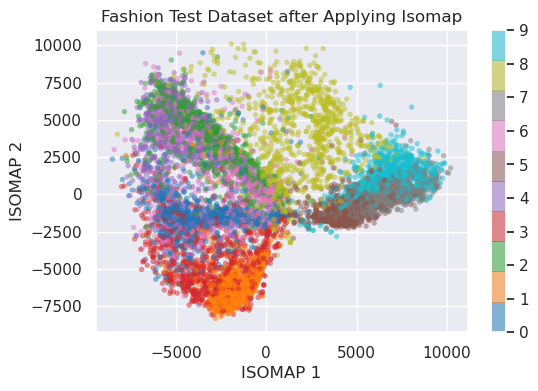

In [5]:
figure = plt.figure(dpi=100)
plt.scatter(Xtestf_isomap[:, 0], Xtestf_isomap[:, 1],c=y_testf, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.title('Fashion Test Dataset after Applying Isomap')
plt.xlabel('ISOMAP 1')
plt.ylabel('ISOMAP 2')
plt.colorbar();

Isomap seems to to partition the classes of the fashion test dataset better than PCA.

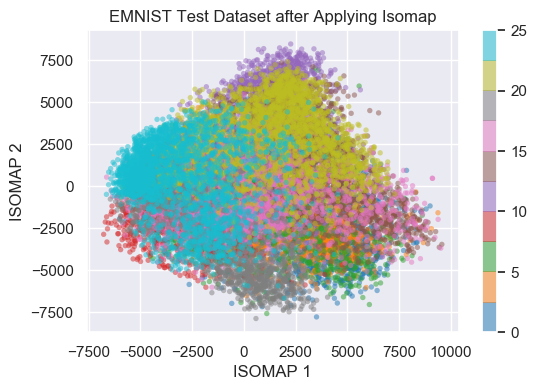

In [7]:
figure = plt.figure(dpi=100)
plt.scatter(Xteste_isomap[:, 0], Xteste_isomap[:, 1],c=y_teste, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.title('EMNIST Test Dataset after Applying Isomap')
plt.xlabel('ISOMAP 1')
plt.ylabel('ISOMAP 2')
plt.colorbar();

Although the classes are still overlapping, I can see more distinguishable colors, rather than only two in the PCA plot for the EMNIST test dataset.

# Kaggle for GPU Accelerated Machine Learning
I decided to utilize Kaggle's GPU for further data analysis on the datasets because I was curious about exactly how much faster the GPU would be than my computer's CPU and also because my personal laptop takes an extremely long time to train the EMNIST dataset due to its large size. I will be using the cuML and Keras packages for the rest of this notebook (and scikit-learn to compare).

I begin by reloading my datasets for Kaggle, since their syntax is a bit different.

In [3]:
fashiontest_kaggle=pd.read_csv('../input/fashion-mnist-testcsv/fashion-mnist_test.csv')
X_testf = fashiontest_kaggle.drop(columns=['label'],inplace=False).to_numpy()
y_testf = fashiontest_kaggle['label'].to_numpy()

fashiontrain_kaggle=pd.read_csv('../input/fashion-train/fashion-mnist_train.csv')
Xf = fashiontrain_kaggle.drop(columns='label',inplace=False)
X_trainf = Xf.to_numpy()
yf = fashiontrain_kaggle['label'].to_numpy()
y_trainf = yf

emnisttrain_kaggle=pd.read_csv('../input/emnist-train/EMNIST_letters_train.csv')
emnisttest_kaggle=pd.read_csv('../input/emnist-letters-testcsv/EMNIST_letters_test.csv')

numbers=list(range(0,785))
labels=['pixel'+str(x+1) for x in numbers]
labels.insert(0, 'label') 
old_namestrain = emnisttrain_kaggle.columns[numbers]
old_namestest = emnisttest_kaggle.columns[numbers]
emnisttrain_kaggle.rename(columns=dict(zip(old_namestrain, labels)), inplace=True)
emnisttest_kaggle.rename(columns=dict(zip(old_namestest,labels)),inplace=True)
emnisttrain_kaggle['label'].replace(list(np.arange(26)+1),list(range(26)), inplace=True)
emnisttest_kaggle['label'].replace(list(np.arange(26)+1),list(range(26)), inplace=True)


Xe = emnisttrain_kaggle.drop(columns='label', inplace=False)
X_traine = Xe.to_numpy()
y_traine = emnisttrain_kaggle['label'].to_numpy()
X_teste = emnisttest_kaggle.drop(columns=['label'],inplace=False).to_numpy()
y_teste = emnisttest_kaggle['label'].to_numpy()


## t-distributed stochastic neighbor embedding (tSNE)
tSNE is categorized under unsupervised learning as a dimension reduction method for high-dimensional data visualization. It takes similarities between data points, changes them into joint probabilities, and attempts to minimize the difference between the joint probabilities of the high-dimensional data and the low-dimensional embedding through gradient descent. These joint probabilities are determined through random walks in each space. tSNE tends to provide significantly better visualizations because it reduces data's tendency to crowd in the middle of a map. tSNE is great for creating a single map that reveals the structure of data with many classes from many viewpoints.

## cuML
cuML is a great package for use of GPU-accelerated machine learning algorithms, so I used its tSNE method to compare with scikit-learn's tSNE method. I decided to run only my fashion data through the TSNE packages, for the EMNIST dataset could not train scikit-learn's tSNE model without my computer shutting down due to overheating, and the EMNIST dataset could not cuML's tSNE model without Kaggle constantly restarting the notebook.

Sequential manifold learning reduces high-dimensional features and gives consistent results. Let's look at the length of time it takes for scikit-learn's tSNE versus cuML's tSNE model to be trained by the fashion test dataset after it was transformed by isomap.

In [6]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(n_jobs = -1)

Xtestf_tsne = tsne.fit_transform(Xtestf_isomap)

CPU times: user 2min 37s, sys: 254 ms, total: 2min 37s
Wall time: 1min 25s


In [7]:
%%time
from cuml import TSNE
tsne = TSNE()

Xtestf_tsne_cml = tsne.fit_transform(Xtestf_isomap) # tsne based on Isomap results

CPU times: user 3.3 s, sys: 1.52 s, total: 4.82 s
Wall time: 9.43 s


cuML's tSNE method took a tenth of the time of scikit-learn's tSNE method. Now let's see how both packages visualized the newly transformed fashion test dataset.

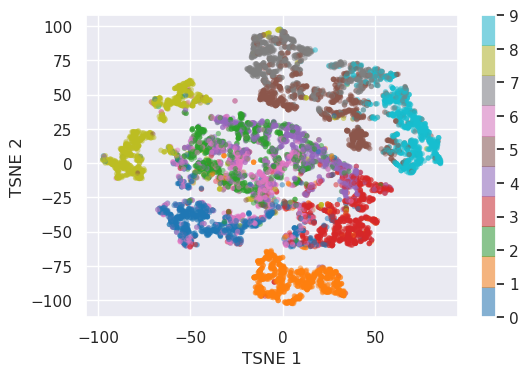

In [8]:
figure = plt.figure(dpi=100)
plt.scatter(Xtestf_tsne[:, 0], Xtestf_tsne[:, 1],c=y_testf, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.colorbar();

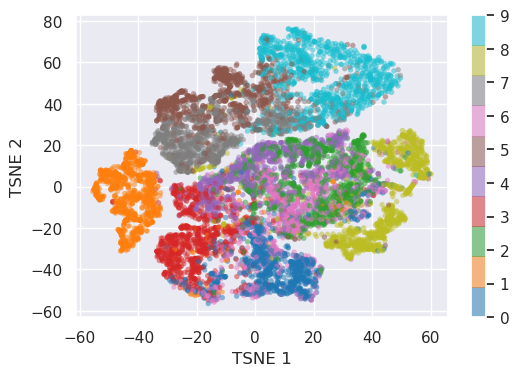

In [9]:
figure = plt.figure(dpi=100)
plt.scatter(Xtestf_tsne_cml[:, 0], Xtestf_tsne_cml[:, 1],c=y_testf, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.colorbar();

Interestingly enough, the plots are different; this could be due to difference in defaults of parameters. Overall, I can see a great improvement in the defintion of these clusters.

## Keras
Keras is a user-friendly, GPU-utilizing package for deep learning that runs on the Tensorflow platform. I used keras to implement a single hidden layer neural network. 

## Single Hidden Layer Neural Network

I chose 512 parameters, the sigmoid function as my activation function for the hidden layer, and the softmax function for the activation function on the output layer. I chose a 1000 batch size and 50 epochs because it produced a decent accuracy value and so it would match the batch size and epoch parameters in my softmax regression. I chose to use specifically a single layer neural network because after some research, it seemed to provide the best results for this type of problem and dataset. 

First, I reformat the label numpy arrays into one-hot form. Then I build my network framework with the chosen amount of parameters, activation functions, and network depth desired. Then a loss function is defined; in this case, it would be a cross-entropy function. Next, I have to train the network by inputing a training set and form linear combinations of those values, putting those linear combinations through the sigmoid function, and then apply the softmax function to those values. 
$$\begin{align*}
    \mathbf{z}_l &= W_l^T\mathbf{a}_{l-1}+\mathbf{b}_l \\
    \mathbf{a}_l &= f_l\big(\mathbf{z}_l\big)
\end{align*} $$

The values of each node are recorded during this process and then the algorithm finds the minimum of the cross-entropy function through back-propagation. Back propagation is essentially the chain-rule, taking the derivatives starting from the end, all the way to the beginning of the network, with each derivative's input being the result of the previous derivative. Back propagation chooses the most optimal parameters that minimizes the cross-entropy function. I chose the ADAM optimizer to match my softmax regression optimizer, and accuracy is the chosen metric of performance. ADAM will alter the weights by using the gradients produced by back propagation.

First let's reformat the label arrays and build the neural network models.

In [10]:
import keras
num_classes = 26 #number of classes
num_classes_ = 10
y_trainf = keras.utils.to_categorical(y_trainf, num_classes_) #reformating of label arrays
y_testf = keras.utils.to_categorical(y_testf, num_classes_)
y_traine = keras.utils.to_categorical(y_traine, num_classes)
y_teste = keras.utils.to_categorical(y_teste, num_classes)


In [11]:
#building the network for fashion dataset
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential 

image_size = 784 # 28*28

fashionmodel = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
fashionmodel.add(Dense(units=512, activation='sigmoid', input_shape=(image_size,)))
fashionmodel.add(Dense(units=num_classes_, activation='softmax'))
fashionmodel.summary() #summary showing 307,050 total parameters calculated through the network

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
#building the network for EMNIST dataset
emnistmodel = Sequential()

emnistmodel.add(Dense(units=512, activation='sigmoid', input_shape=(image_size,)))
emnistmodel.add(Dense(units=num_classes, activation='softmax'))#same parameters as above, but with different class size
emnistmodel.summary()#summary showing 415,258 parameters from the network

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 26)                13338     
Total params: 415,258
Trainable params: 415,258
Non-trainable params: 0
_________________________________________________________________


Now that we've built the neural networks, let's train them with the training datasets and implement them on the test datasets.

In [13]:
#train the model for fashion test dataset, predict the labels of test data, and report accuracy of neural network model
fashionmodel.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = fashionmodel.fit(X_trainf, y_trainf, batch_size=1000, epochs=50, verbose=False, validation_split=.1)
loss, clf5  = fashionmodel.evaluate(X_testf, y_testf, verbose=False)
print(f'Test accuracy: {clf5:.3}')#accuracy

Test accuracy: 0.839


In [14]:
#train the model for EMNIST test dataset, predict the labels, and report accuracy
emnistmodel.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = emnistmodel.fit(X_traine, y_traine, batch_size=1000, epochs=50, verbose=False, validation_split=.1)
loss, clf6  = emnistmodel.evaluate(X_teste, y_teste, verbose=False)
print(f'Test accuracy: {clf6:.3}')#accuracy


Test accuracy: 0.873


The single-layer neural network model worked better on the EMNIST test dataset than on the fashion test dataset, which is unlike the results from the softmax regression and random forest classifiers. Let's look at how they all performed again.

In [18]:
for clf, label in zip([clf1, clf2, clf3, clf4], ['Handwritten Softmax Regression on Fashion Dataset','Handwritten Softmax Regression on EMNIST Dataset', 'Random Forest on Fashion Dataset', 'Random Forest on EMNIST Dataset']):
     print("Accuracy on Test: %0.2f [%s]" % (clf, label))

Accuracy on Test: 0.85 [Handwritten Softmax Regression on Fashion Dataset]
Accuracy on Test: 0.71 [Handwritten Softmax Regression on EMNIST Dataset]
Accuracy on Test: 0.77 [Random Forest on Fashion Dataset]
Accuracy on Test: 0.59 [Random Forest on EMNIST Dataset]


In [15]:
for clf, label in zip([clf5,clf6],['Neural Network on Fashion Dataset', 'Neural Network on EMNIST data']):
     print("Accuracy on Test: %0.2f [%s]" % (clf, label))

Accuracy on Test: 0.84 [Neural Network on Fashion Dataset]
Accuracy on Test: 0.87 [Neural Network on EMNIST data]


## Conclusion
The softmax regression gave the highest accuracy for the fashion test dataset, and the neural network did the best on the EMNIST test dataset. This may be an indicator of the EMNIST data containing more non-linear relationships than the fashion dataset, or maybe the parameter values that I chose could have been tweaked to give a different result. Nonetheless, it was interesting to see that the neural network did not perform best on both datasets, but this just goes to show that neural networks will not necessarily perform the best for all machine learning problems.